# Band structure of honeycomb lattice

In [2]:
# Thermal emitter# reload automaticaly so that any changes in the python files of 'functions.py' will be updated without restarting the kernel
%load_ext autoreload
%autoreload 2

# to acutally see the matplotlib plots instead of something like <matplotlib.figure.Figure at 0x7f5420169b38>
%matplotlib inline

In [3]:
import sys
root_folder = '../src'
sys.path.insert(1, root_folder) # insert at 1, 0 is the script path (or '' in REPL)

import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from params import Params

In [5]:
def R(x,y,x_tab):  
    r = np.linalg.norm(np.subtract(x_tab,np.array([x,y])),axis=1)
    r_min = np.min(r)
   
    p = 8.0
    d = 0.5
    y = -p*m.exp(-r_min**2/d**2)

    return y

def honeycomb_1d(params): 
    x_tab = params.b*np.array([[0, 0],[0.5, 0.5*m.sqrt(3)], [1.5, 0.5*m.sqrt(3)],[2, 0]])

    for ii in range(params.Nx-1):
        x_shift = np.add(x_tab[0:4], (ii+1)*(params.a1+params.a2))
        x_tab = np.vstack((x_tab, x_shift))
        
    return x_tab

def honeycomb_2d(params): 
    x_tab = honeycomb_1d(params)
    
    for ii in range(params.Ny-1):
        x_shift = np.add(x_tab[0:4*params.Nx], (ii+1)*(params.a1-params.a2))
        x_tab = np.vstack((x_tab, x_shift))

    return x_tab

## Test building structures

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 5, Ny = 1
Number of plane waves: Nkx = 15, Nky = 5
Nkx_max = 7, Nky_max = 2
Period: a = 1, Side length: b = 0.5773502691896258
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Grid size: dx = 0.05, dy = 0.05
Reciprocal lattice vectors: g1 = [0.5       0.8660254], g2 = [-0.5        0.8660254]

(400, 100)


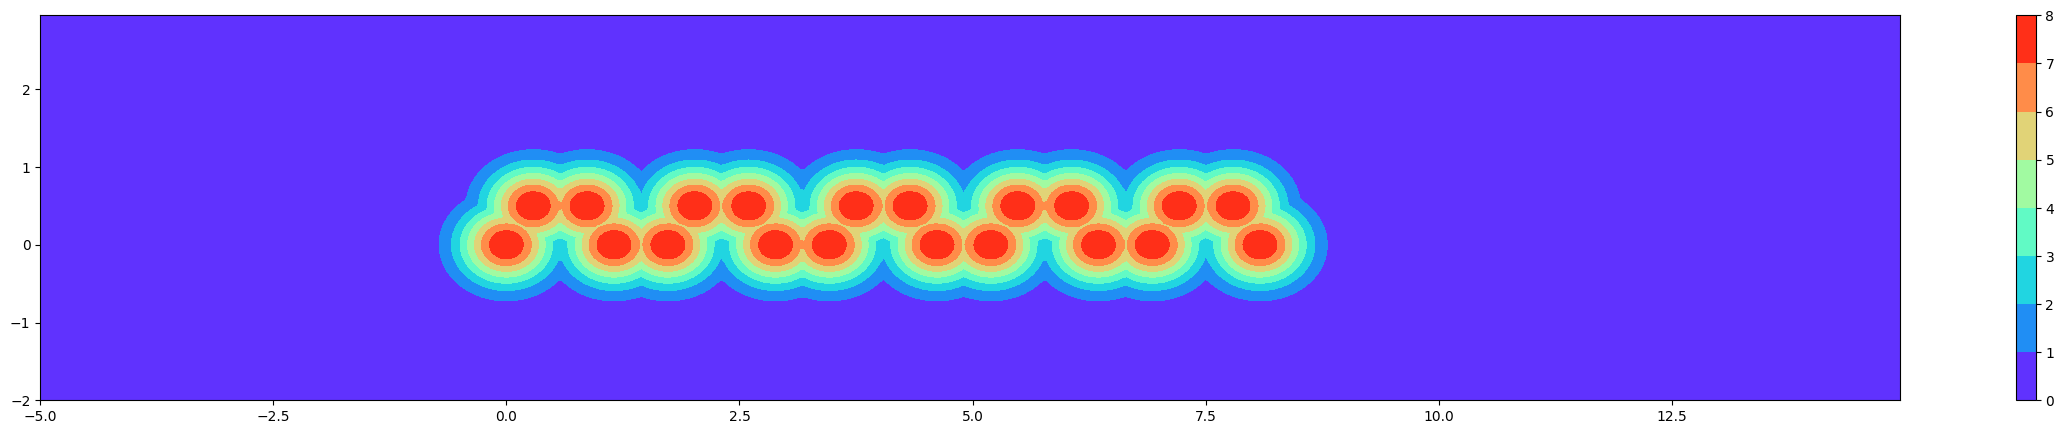

In [6]:
params = Params(Nx = 5)
print(params)

x_tab = honeycomb_1d(params)

x_ = np.arange(-5,15, params.dx)
y_ = np.arange(-2,3, params.dy) 
nx = len(x_)
ny = len(y_)

X,Y = np.meshgrid(x_, y_,indexing='ij')
R_tab = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        R_tab[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)
        
print(R_tab.shape)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*R_tab, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 8, Ny = 3
Number of plane waves: Nkx = 15, Nky = 5
Nkx_max = 7, Nky_max = 2
Period: a = 1, Side length: b = 0.5773502691896258
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Grid size: dx =  0.05, dy = 0.05
Reciprocal lattice vectors: g1 = (2*pi/Lx)[0.5       0.8660254], g2 = (2*pi/Ly)[-0.5        0.8660254]



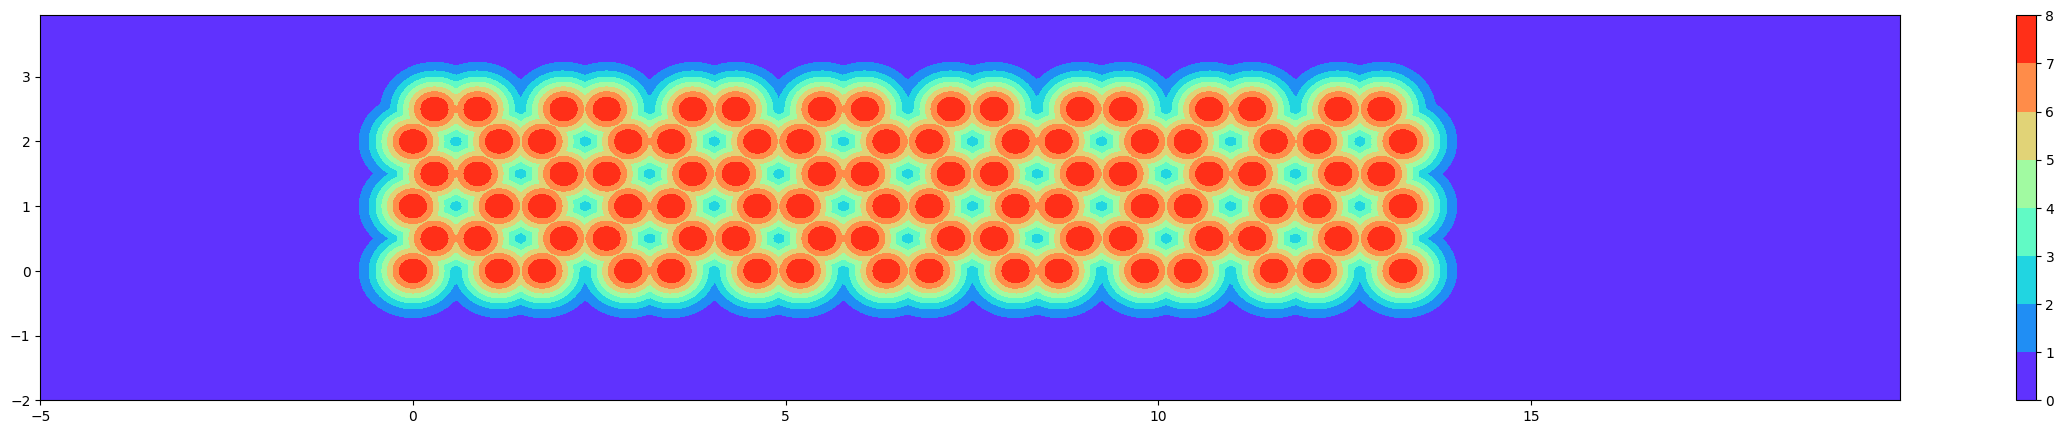

In [39]:
params = Params(Nx=8, Ny=3)
print(params)

x_tab = honeycomb_2d(params)

x_ = np.arange(-5,20, params.dx)
y_ = np.arange(-2,4, params.dy) 
nx = len(x_)
ny = len(y_)

X,Y = np.meshgrid(x_, y_,indexing='ij')
Z = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        Z[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(30,5))
h = plt.contourf(X, Y, -1*Z, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

## Calculate coefficients in plane wave expansion

#####################
### Params system ###
#####################
Domain size (in period a): Nx = 2, Ny = 2
Number of plane waves: Nkx = 51, Nky = 51
Nkx_max = 25, Nky_max = 25
Period: a = 1, Side length: b = 0.5773502691896258
Lattice vectors: a1 = [0.8660254 0.5      ], a2 = [ 0.8660254 -0.5      ]
Grid size: dx =  0.02, dy = 0.02
Reciprocal lattice vectors: g1 = (2*pi/Lx)[0.5       0.8660254], g2 = (2*pi/Ly)[-0.5        0.8660254]



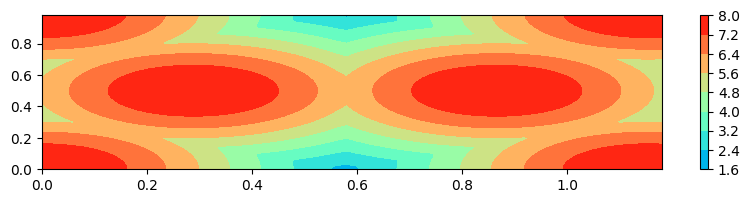

In [53]:
params = Params(Nx=2, Ny=2, Nkx=51, Nky=51, dx=0.02, dy=0.02)
print(params)

x_tab = honeycomb_2d(params)

x_ = np.arange(0, 1.2, params.dx)
y_ = np.arange(0, 1, params.dy) 
# y_ = np.arange(0, params.b*m.sqrt(3), params.dy) 
nx = len(x_)
ny = len(y_)

X,Y = np.meshgrid(x_, y_,indexing='ij')
Z = np.empty([nx,ny])
C = np.zeros([params.Nkx,params.Nky])

nkx0 = np.floor(params.Nkx/2)
nky0 = np.floor(params.Nky/2)

R_tab = np.empty([nx,ny])

for ii in range(nx):
    for jj in range(ny):
        R_tab[ii,jj] = R(X[ii,jj],Y[jj,jj],x_tab)

plt.figure(figsize=(10,2))
h = plt.contourf(X, Y, -1*R_tab, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

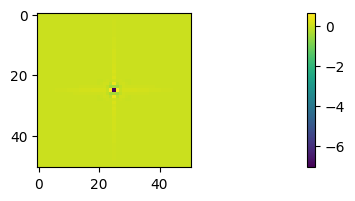

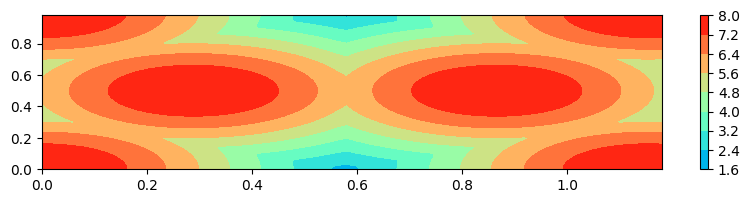

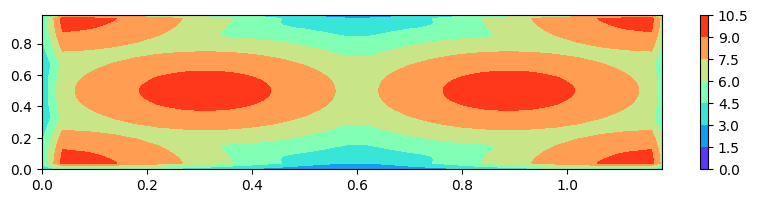

In [54]:
kx = 0.

R_G_mat = np.zeros([params.Nkx,params.Nky]) 

for ii in range(params.Nkx): 
    for jj in range(params.Nky):
        k = np.array([kx,0]) + (ii-params.Nkx_max) *params.G1 + (jj-params.Nky_max)*params.G2
    
        sum_x = np.trapz(R_tab * np.exp(1j*k[0]*X ), dx=params.dx, axis=0)
        sum_y = np.trapz(sum_x * np.exp(1j*k[1]*y_), dx=params.dy, axis=0)
        
        R_G_mat[ii,jj] = sum_y

# Rebuild R from Fourier components
u = np.zeros([nx,ny],dtype='complex128')

for ii in range(params.Nkx):
    for jj in range(params.Nky):
        k = np.array([kx,0]) + (ii-params.Nkx_max)*params.G1 + (jj-params.Nky_max)*params.G2        
        u += R_G_mat[ii,jj]* np.exp(-1j*k[0]*X)* np.exp(-1j*k[1]*Y)
        
# print(R_G_mat)

plt.figure(figsize=(30,2))
plt.imshow(R_G_mat);
plt.colorbar()
plt.show()

plt.figure(figsize=(10,2))
h = plt.contourf(X, Y, -1*R_tab, cmap="rainbow")

plt.colorbar()
plt.clim(0,8)
plt.show()

plt.figure(figsize=(10,2))
h = plt.contourf(X, Y, -1*u, cmap="rainbow")

plt.colorbar()
plt.show()